In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
import sklearn
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def gen2(n,a,b,arr):
        for i in range(0, n):
                training_data_list = []
                for j in range(0, 20):
                    x = random.uniform(a, b)
                    training_data_list.append(x)
                arr.append(training_data_list)

arr = []
gen2(100, 0, 1,arr)
gen2(100, 3, 4,arr)


print(arr)
feature_names=['x','y','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1']


target_names=['cl1','cl2']



target =[]
x = 0
for i in range(1, 201):
    target.append(x)
    if(i%100==0):
        x+=1
print (target_names)
print (target)

[[0.8938897349369643, 0.17116038306021897, 0.6023424841682485, 0.5396760837204044, 0.025483312442371564, 0.7077409405320375, 0.1613481133842971, 0.5486948683176389, 0.2718295628436568, 0.6674570679598743, 0.8609808533468918, 0.23789698146292715, 0.33927004412012585, 0.45474935723866106, 0.5574366922464932, 0.6149750023076807, 0.4059993897087375, 0.8521455775458793, 0.8482751888054829, 0.3809212324777175], [0.9892913614780356, 0.6272094719015349, 0.37895808758228466, 0.009682225305289172, 0.19132953666233687, 0.18678079190756713, 0.12473404344573957, 0.2682809207812624, 0.32554221408606, 0.864261459055012, 0.5748624483717814, 0.5833075675924211, 0.18306937467731565, 0.04607734442634537, 0.17022169732855807, 0.3850230663777128, 0.5648712938125456, 0.5594156731573, 0.9985178286540105, 0.8031170768728304], [0.14727940953084395, 0.7012301391734433, 0.6405224719509546, 0.8490014572405636, 0.38233360012147843, 0.5309075759537832, 0.16609349912049343, 0.5866528008607623, 0.2679305584844214, 0.

In [5]:
iris_frame = DataFrame(arr)
iris_frame.columns = feature_names
iris_frame['target'] = target
#iris_frame['feature_names'] = feature_names
iris_frame['name'] = iris_frame.target.apply(lambda x : target_names[x])
print(iris_frame)

            x         y         1         1         1         1         1  \
0    0.893890  0.171160  0.602342  0.539676  0.025483  0.707741  0.161348   
1    0.989291  0.627209  0.378958  0.009682  0.191330  0.186781  0.124734   
2    0.147279  0.701230  0.640522  0.849001  0.382334  0.530908  0.166093   
3    0.374360  0.915165  0.928038  0.421775  0.788039  0.539110  0.830355   
4    0.302386  0.063645  0.942154  0.509370  0.969238  0.311699  0.667690   
..        ...       ...       ...       ...       ...       ...       ...   
195  3.253635  3.797090  3.859909  3.505478  3.531871  3.806992  3.665790   
196  3.540129  3.837683  3.247225  3.283141  3.778306  3.102312  3.487922   
197  3.034321  3.946808  3.761115  3.218335  3.819102  3.643923  3.650529   
198  3.501114  3.951800  3.607436  3.305257  3.222719  3.598310  3.896411   
199  3.345539  3.092311  3.615044  3.813877  3.801260  3.201062  3.190652   

            1         1         1  ...         1         1         1  \
0  

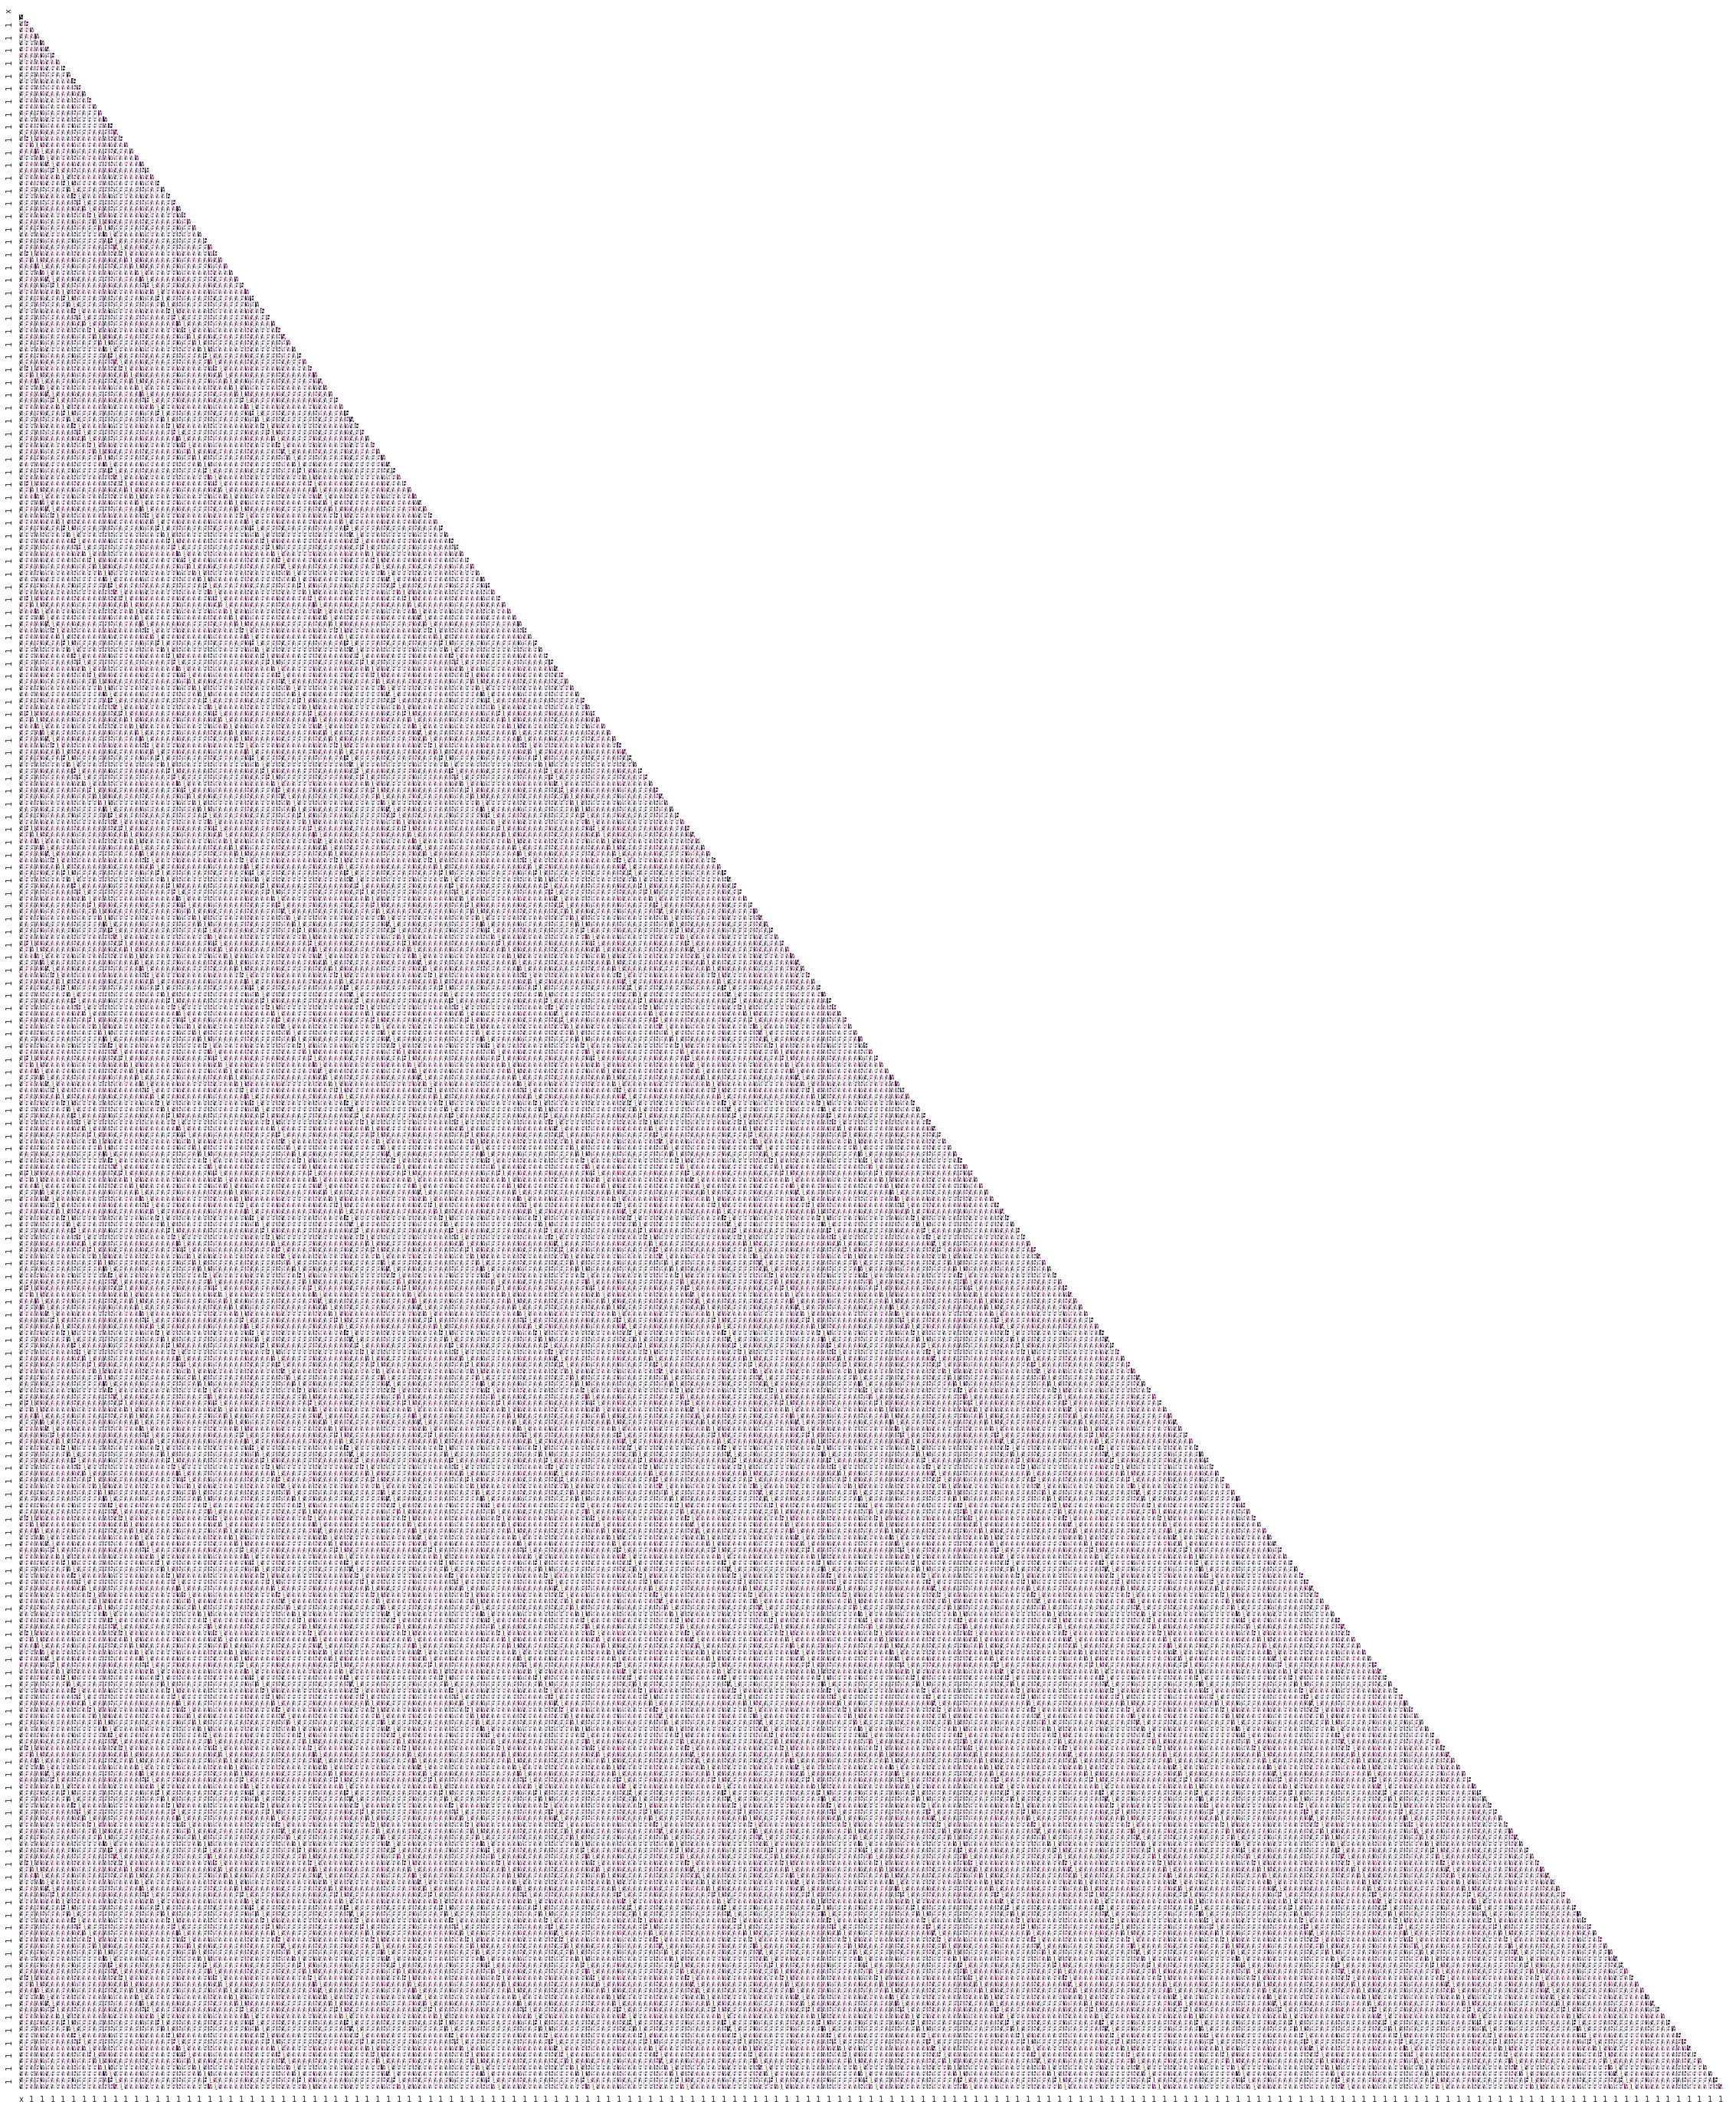

In [6]:
pyplot.figure(figsize=(40, 50))
import seaborn as sns
corr = iris_frame[['x','y','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, cbar=False, annot=True, linewidths=.5)

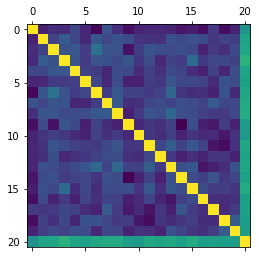

In [7]:
plt.matshow(iris_frame.corr())

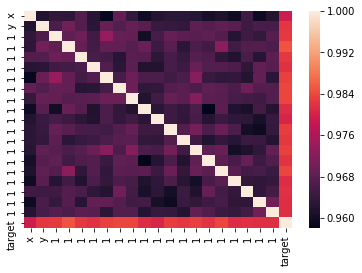

In [8]:
corr = iris_frame.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
# Импорт стандартного скалярного модуля

from sklearn.preprocessing import StandardScaler

  
df = iris_frame[['x','y','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1']]
scalar = StandardScaler()
a = ['x','y','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1']
  
# примерка
scalar.fit(df)

scaled_data = scalar.transform(df)

  
# Импорт PCA

from sklearn.decomposition import PCA

  
# Допустим, компоненты = 2

pca = PCA(n_components = 2)

pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

  
x_pca.shape

(200, 2)

Text(0, 0.5, 'Second Principal Component')

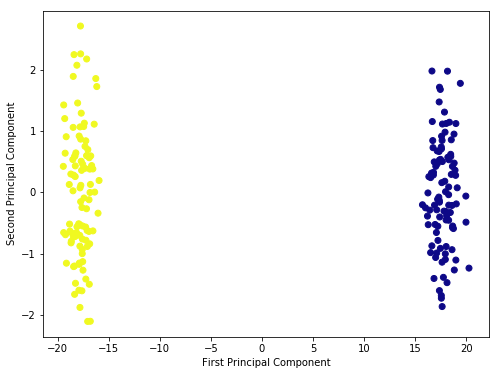

In [10]:
# дает больший участок

plt.figure(figsize =(8, 6))

  

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = iris_frame['target'], cmap ='plasma')

  
# маркировка осей X и Y

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

In [11]:
pca.components_

array([[-0.05509866, -0.05533546, -0.05545425, -0.05546361, -0.05538253,
        -0.0553864 , -0.05542992, -0.05543702, -0.05547477, -0.055278  ,
        -0.05528184, -0.05539937, -0.05532791, -0.05545784, -0.05538924,
        -0.05544391, -0.05529709, -0.05531707, -0.05533917, -0.05538579,
        -0.05545425, -0.05546361, -0.05538253, -0.0553864 , -0.05542992,
        -0.05543702, -0.05547477, -0.055278  , -0.05528184, -0.05539937,
        -0.05532791, -0.05545784, -0.05538924, -0.05544391, -0.05529709,
        -0.05531707, -0.05533917, -0.05538579, -0.05545425, -0.05546361,
        -0.05538253, -0.0553864 , -0.05542992, -0.05543702, -0.05547477,
        -0.055278  , -0.05528184, -0.05539937, -0.05532791, -0.05545784,
        -0.05538924, -0.05544391, -0.05529709, -0.05531707, -0.05533917,
        -0.05538579, -0.05545425, -0.05546361, -0.05538253, -0.0553864 ,
        -0.05542992, -0.05543702, -0.05547477, -0.055278  , -0.05528184,
        -0.05539937, -0.05532791, -0.05545784, -0.0

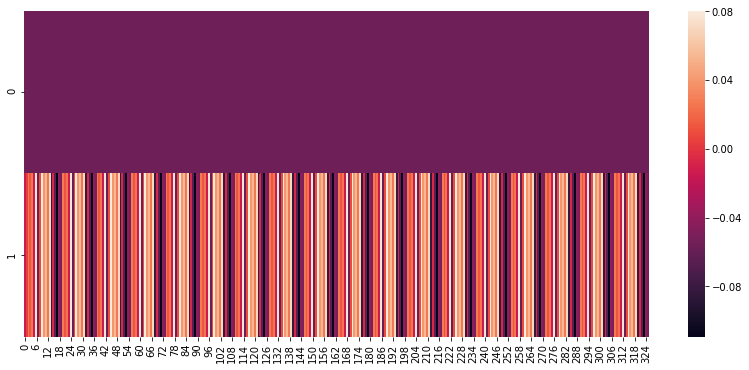

In [12]:
a
df_comp = pd.DataFrame(pca.components_)

  

plt.figure(figsize =(14, 6))

  
# построение тепловой карты
sns.heatmap(df_comp)

In [ ]:
plt.plot(pca.explained_variance_ratio_)

plt.show()

In [ ]:
cumulative = []

last = 0

for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]

plt.plot(cumulative)
plt.show()

In [ ]:
from numpy import linalg as LA
print(('Критерий Кайзера предлагает {} ГК.').format(len(df_comp.eig[df_comp.eig > 1])))
